# Learning theory - continued


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay


## Let's try to put it all into practice

We will use a german credit reisk dataset that classifies people into good or bad risks from:
https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

First we will need to load our data (you will also need to upload the data to colab first):

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv('4_german_credit_data.csv')

# Display the first few rows to get an initial understanding
data.head()


,CheckingAccountStatus,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccountBonds,PresentEmploymentSince,InstallmentRatePercentage,PersonalStatusSex,OtherDebtorsGuarantors,...,Property,Age,OtherInstallmentPlans,Housing,NumberOfExistingCredits,Job,NumberOfPeopleBeingLiable,Telephone,ForeignWorker,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


After loading the dataset, it's essential to get a quick overview of its characteristics, such as the number of rows and columns, the data types of the columns, and basic statistics of numerical columns.

In [ ]:
# Get a concise summary of the dataset
data.info()

# Get basic statistics of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CheckingAccountStatus      1000 non-null   object
 1   Duration                   1000 non-null   int64 
 2   CreditHistory              1000 non-null   object
 3   Purpose                    1000 non-null   object
 4   CreditAmount               1000 non-null   int64 
 5   SavingsAccountBonds        1000 non-null   object
 6   PresentEmploymentSince     1000 non-null   object
 7   InstallmentRatePercentage  1000 non-null   int64 
 8   PersonalStatusSex          1000 non-null   object
 9   OtherDebtorsGuarantors     1000 non-null   object
 10  PresentResidenceSince      1000 non-null   int64 
 11  Property                   1000 non-null   object
 12  Age                        1000 non-null   int64 
 13  OtherInstallmentPlans      1000 non-null   object
 14  Housing  

,Duration,CreditAmount,InstallmentRatePercentage,PresentResidenceSince,Age,NumberOfExistingCredits,NumberOfPeopleBeingLiable,CreditRisk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
data.head()

What we can see is that the dataset contains 21 columns: 20 features and 1 target column (CreditRisk).
Features are a mix of categorical (e.g., CheckingAccountStatus, CreditHistory) and numerical (e.g., Duration, CreditAmount) data types.
The target column CreditRisk has two classes: 1 (Good Risk) and 2 (Bad Risk).

Note we have lot's of categorical data, we would need to understand how these features work and how the values are distributed. For example:


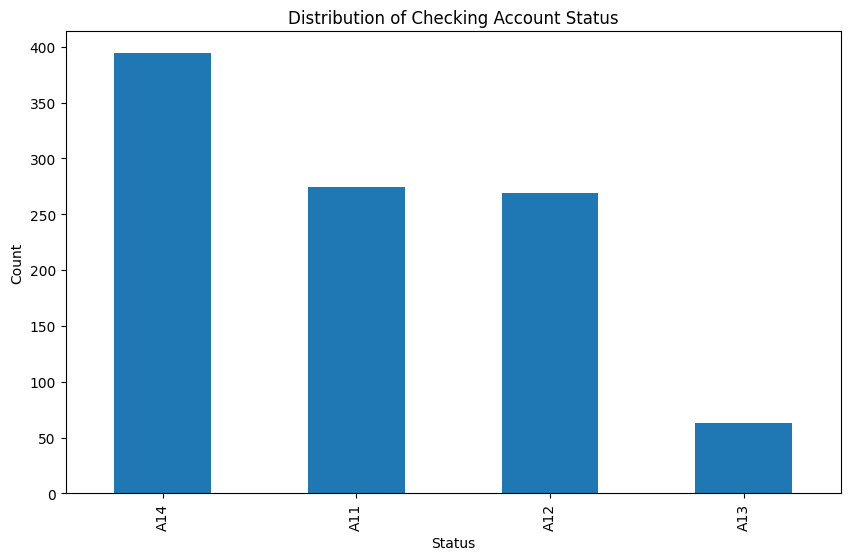

In [ ]:
# Check the distribution of some categorical features
plt.figure(figsize=(10, 6))
data['CheckingAccountStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Checking Account Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

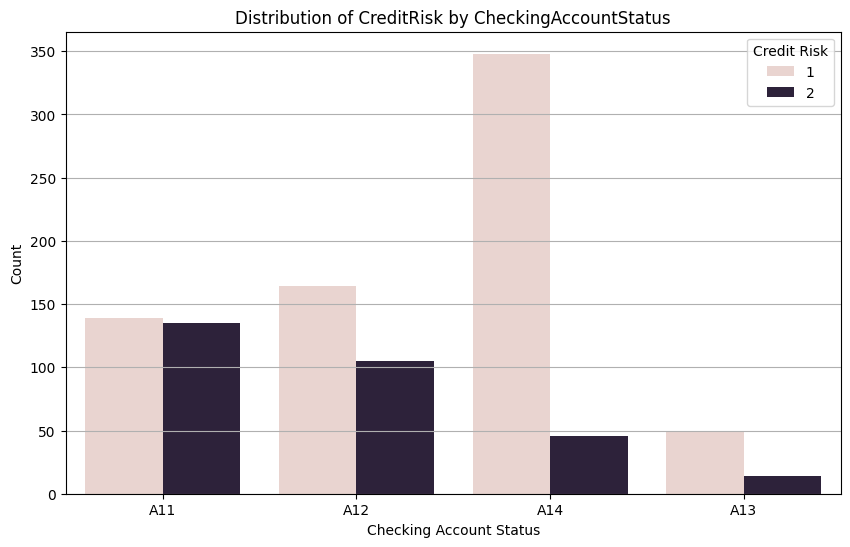

In [ ]:
# Plot the CheckingAccountStatus against the CreditRisk
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CheckingAccountStatus', hue='CreditRisk')
plt.title('Distribution of CreditRisk by CheckingAccountStatus')
plt.ylabel('Count')
plt.xlabel('Checking Account Status')
plt.legend(title='Credit Risk', loc='upper right')
plt.grid(axis='y')

plt.show()


1. A11 (< 0 DM): This category has the highest proportion of high risk.
2. A12 (0 <= ... < 200 DM): The number of low-risk individuals is slightly higher than high-risk individuals.
3. A13 (>= 200 DM / salary assignments for at least 1 year): A higher proportion of individuals are low risk, but there is still a significant number of high-risk individuals.
4. A14 (no checking account): A majority of individuals in this category are labeled as low risk.

We hsould really look at all the variables.

Numerical values are a bit easier to look at:

In [ ]:
# Calculate the correlation of numerical features with the target variable 'CreditRisk'
correlations = data.corr(numeric_only=True)['CreditRisk'].sort_values()

correlations

,CreditRisk
Age,-0.091127
NumberOfExistingCredits,-0.045732
NumberOfPeopleBeingLiable,-0.003015
PresentResidenceSince,0.002967
InstallmentRatePercentage,0.072404
CreditAmount,0.154739
Duration,0.214927
CreditRisk,1.000000


Let's pick some features:

* Duration: As we observed, it has a positive correlation with the target variable.
* Amount: The amount of the loan can be an indicator of risk.
* Age: Age might play a role in determining creditworthiness.
* CheckingAccountStatus: As seen in the plot, different levels of checking account status have different risk distributions.
* CreditHistory: The credit history of a person can be a significant indicator of their credit risk.
* Purpose: The purpose of the loan can influence the risk associated with it.
* SavingsAccountBonds: Savings can be an indicator of financial stability.

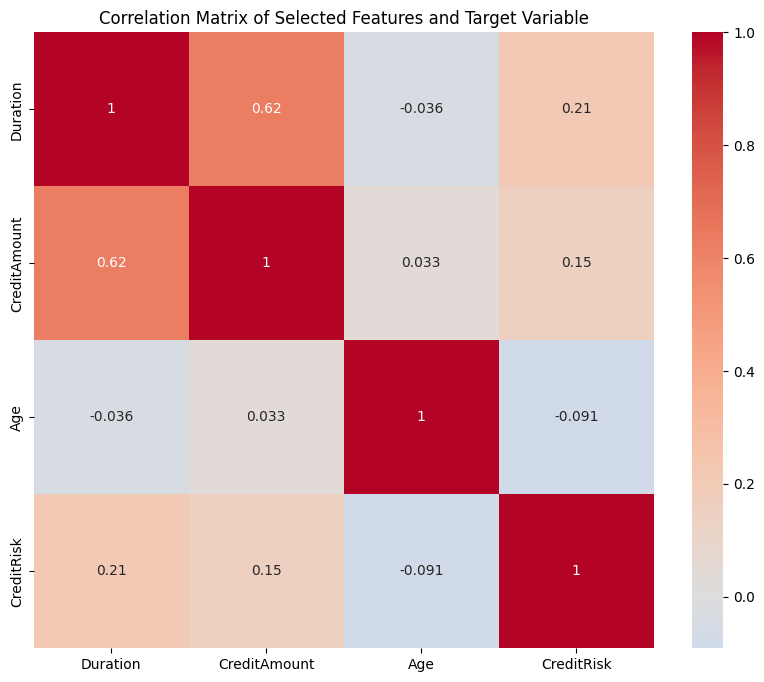

In [ ]:
# Selecting initial set of features
selected_features = ['Duration', 'CreditAmount', 'Age', 'CheckingAccountStatus',
                     'CreditHistory', 'Purpose', 'SavingsAccountBonds']

# Plotting correlation matrix for these features and the target variable
correlation_matrix = data[selected_features + ['CreditRisk']].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features and Target Variable')
plt.show()


We still need to think about cleaning and transforming our data a little:

Handle Missing Data: Ensure that there's no missing data in the dataset or decide on a strategy to handle them (e.g., imputation).

Convert Categorical Data: Convert categorical variables into a format suitable for KNN, typically using one-hot encoding.

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(f"missing values - {missing_values}")


missing values - CheckingAccountStatus        0
Duration                     0
CreditHistory                0
Purpose                      0
CreditAmount                 0
SavingsAccountBonds          0
PresentEmploymentSince       0
InstallmentRatePercentage    0
PersonalStatusSex            0
OtherDebtorsGuarantors       0
PresentResidenceSince        0
Property                     0
Age                          0
OtherInstallmentPlans        0
Housing                      0
NumberOfExistingCredits      0
Job                          0
NumberOfPeopleBeingLiable    0
Telephone                    0
ForeignWorker                0
CreditRisk                   0
dtype: int64


In [ ]:
# Drop rows with missing values if any exist
data_cleaned = data.dropna()

We are going to apply one-hot encoding to the categorical features.

One-Hot Encoding is a method used to convert categorical data variables so they can be provided to machine learning algorithms to improve predictions. Machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to numbers. One of the most common ways to do this transformation is by using one-hot encoding.

How It Works:
Identify Unique Categories: For each categorical variable, identify the unique categories it can take.

Create New Columns: For each unique category, a new binary (0 or 1) column is created.

Binary Indication:

For each record, the column corresponding to the category the variable takes value will have a '1', and all other new columns will have a '0'.
This means that out of all the new columns for a categorical variable, only one can take the value '1' for a given record.

**Important** One drawback of one-hot encoding is that it can increase the dimensionality of the dataset significantly if the categorical variable has many unique values.
It can also lead to multicollinearity, a situation where two or more variables are highly correlated. In the context of one-hot encoding, one variable can be predicted from the others. This is called the dummy variable trap.
To avoid the dummy variable trap, one common practice is to drop one of the one-hot encoded columns (hence, for a variable with n categories, we keep n−1 dummy columns).

In [ ]:
# Identify numerical and categorical columns
numeric_features = ['Duration', 'CreditAmount', 'Age']
categorical_features = ['CheckingAccountStatus', 'CreditHistory', 'Purpose', 'SavingsAccountBonds']

# Apply one-hot encoding using pandas get_dummies method
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features,dtype=int)

# Display the first few rows of the encoded data
data_encoded.head()

,Duration,CreditAmount,PresentEmploymentSince,InstallmentRatePercentage,PersonalStatusSex,OtherDebtorsGuarantors,PresentResidenceSince,Property,Age,OtherInstallmentPlans,...,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,SavingsAccountBonds_A61,SavingsAccountBonds_A62,SavingsAccountBonds_A63,SavingsAccountBonds_A64,SavingsAccountBonds_A65
0,6,1169,A75,4,A93,A101,4,A121,67,A143,...,0,0,0,0,0,0,0,0,0,1
1,48,5951,A73,2,A92,A101,2,A121,22,A143,...,0,0,0,0,0,1,0,0,0,0
2,12,2096,A74,2,A93,A101,3,A121,49,A143,...,0,0,1,0,0,1,0,0,0,0
3,42,7882,A74,2,A93,A103,4,A122,45,A143,...,0,0,0,0,0,1,0,0,0,0
4,24,4870,A73,3,A93,A101,4,A124,53,A143,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_encoded.columns

Index(['Duration', 'CreditAmount', 'PresentEmploymentSince',
       'InstallmentRatePercentage', 'PersonalStatusSex',
       'OtherDebtorsGuarantors', 'PresentResidenceSince', 'Property', 'Age',
       'OtherInstallmentPlans', 'Housing', 'NumberOfExistingCredits', 'Job',
       'NumberOfPeopleBeingLiable', 'Telephone', 'ForeignWorker', 'CreditRisk',
       'CheckingAccountStatus_A11', 'CheckingAccountStatus_A12',
       'CheckingAccountStatus_A13', 'CheckingAccountStatus_A14',
       'CreditHistory_A30', 'CreditHistory_A31', 'CreditHistory_A32',
       'CreditHistory_A33', 'CreditHistory_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
       'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'SavingsAccountBonds_A61', 'SavingsAccountBonds_A62',
       'SavingsAccountBonds_A63', 'SavingsAccountBonds_A64',
       'SavingsAccountBonds_A65'],
      dtype='object')

In [ ]:
encoded_features = data_encoded.columns[17:].to_list() + numeric_features

In [ ]:
encoded_features

['CheckingAccountStatus_A11',
 'CheckingAccountStatus_A12',
 'CheckingAccountStatus_A13',
 'CheckingAccountStatus_A14',
 'CreditHistory_A30',
 'CreditHistory_A31',
 'CreditHistory_A32',
 'CreditHistory_A33',
 'CreditHistory_A34',
 'Purpose_A40',
 'Purpose_A41',
 'Purpose_A410',
 'Purpose_A42',
 'Purpose_A43',
 'Purpose_A44',
 'Purpose_A45',
 'Purpose_A46',
 'Purpose_A48',
 'Purpose_A49',
 'SavingsAccountBonds_A61',
 'SavingsAccountBonds_A62',
 'SavingsAccountBonds_A63',
 'SavingsAccountBonds_A64',
 'SavingsAccountBonds_A65',
 'Duration',
 'CreditAmount',
 'Age']

Let's create our data finally:

In [ ]:
X = data_encoded[encoded_features]
y = data_encoded['CreditRisk'] - 1  # Convert to 0 and 1

Now remember, before we go any further we need to split our data. This is essential to assesing our data.

In [ ]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 27), (200, 27), (800,), (200,))

Now we can initialise our model:

In [ ]:
# Initialise a KNeighborsClassifier with n_neighbors=5
knn5 = KNeighborsClassifier(n_neighbors = 5)

Next we fit our model to the data, be careful which data to use:

In [ ]:
# Fit the model
knn5.fit(X_train,y_train)

KNeighborsClassifier()

Next we apply our model to make prediction, in this case on the test set:

In [ ]:
# generate predictions on the test test
y_pred = knn5.predict(X_test)

Let's take a look at what's happening, it's always worth checking your confusion matrix.

```confusion_matrix(y_true, y_pred)```

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


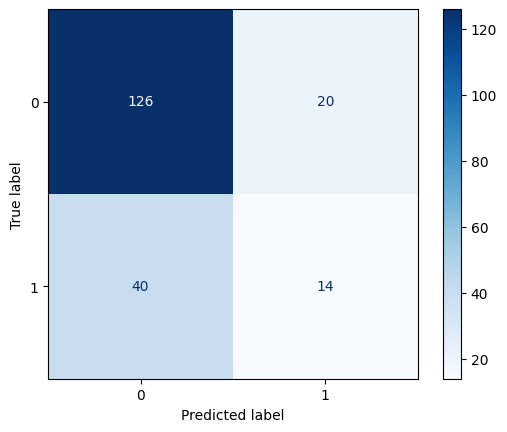

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Complete the below function to calculate our metrics. You can make use of confusion matrix:

![CM](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*uR09zTlPgIj5PvMYJZScVg.png)

```
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
```

In [27]:
def compute_accuracy(y_true, y_pred):
    """Compute accuracy. What propotion of predictions were correct."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tn + tp) / (tn + fp + fn + tp)

def compute_recall(y_true, y_pred):
    """Compute recall (sensitivity). How all actual positive values, how many did we get."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def compute_precision(y_true, y_pred):
    """Compute precision. Of all positive predictions, how many were correct."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp)


Apply our new functions to the model:

In [30]:
print(compute_accuracy(y_test, y_pred))
print(compute_recall(y_test, y_pred))
print(compute_precision(y_test, y_pred))

0.7
0.25925925925925924
0.4117647058823529


Another metric of interest is the F1 score, this help us by balancing precision and recall.

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Create a function to calculate f1 score and apply it to our model:


In [33]:
def compute_f1(y_true, y_pred):
    """Compute f1."""
    precision = compute_precision(y_true, y_pred)
    recall = compute_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)


In [34]:
print(compute_f1(y_test, y_pred))

0.3181818181818182


Remember we have the ability to adjust the focus of our classifier. The ROC curve let's us explore our options in this adjustment and let's us compare classifiers for their ability to give us more options. Let's apply
```
fpr, tpr, thresholds = roc_curve(y_true, y_score)
```
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


In [35]:
# first we need the class probability estimates
y_prob = knn5.predict_proba(X_test)[:,1]

In [36]:
# then we can use the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

We also also interested in the area under the curve metric. We can use:

```
roc_auc_score(y_true, y_score)
```

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [38]:
auc = roc_auc_score(y_test, y_prob)

We can also calculate based on fpr, and tpr with `auc(fpr, tpr)`

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html


Typically we like to visualise this curve, we can use the values we generated or the function:
```
RocCurveDisplay(fpr= , tpr= , roc_auc= ).plot()
```
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

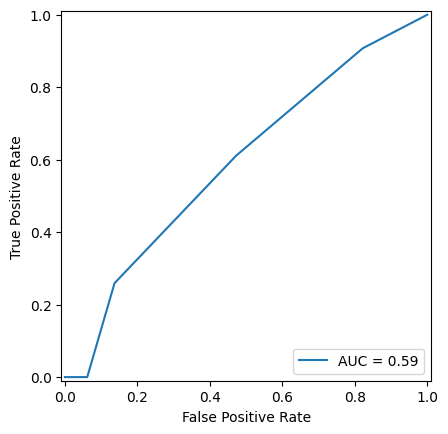

In [40]:
RocCurveDisplay(fpr= fpr, tpr=tpr, roc_auc=auc).plot()

Not a great model! Still we have some options to adjust, imagine we are very concerned with False negatives, credit risks we missed. How can we adjust our classifier:

In [ ]:
# Predict class probabilities using predict_proba(X_test)[:, 1]



In [43]:
# Adjust the threshold to decrease the FNR (and increase TPR)
threshold = 0.3
y_pred_adjusted = (y_prob > threshold).astype(int)

# Calculate and print metrics with the adjusted threshold
print(compute_accuracy(y_test, y_pred_adjusted))
print(compute_recall(y_test, y_pred_adjusted))
print(compute_precision(y_test, y_pred_adjusted))
print(compute_f1(y_test, y_pred_adjusted))

0.55
0.6111111111111112
0.3235294117647059
0.42307692307692313


## Exercises

Ok, time for you to give it all a try. We have already created all the data you need, split it into test and training datasets. Your job:

First, fit a linear model (LinearRegression) and different KNN models with different values of k to the data see what you think perfodms best. Remember the steps:

* Initialise the model

* Fit the model

* Make predictions (a little trickier for the linearRegression, but you have lots of examples).

* Evaluate the model by evaluating thepredictions

Compare the models and decide the model that works best.

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = (lr.predict(X_test) > 0.5).astype(int)

lr_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0])

Using the model you believe works best, adjust the threshold to:


*   Maximise precision
*   Maximise recall
*   Maximise accuracy

Taking a look at the ROC might help.






In [50]:
print(compute_accuracy(y_test, lr_predict))
print(compute_recall(y_test, lr_predict))
print(compute_precision(y_test, lr_predict))
print(compute_f1(y_test, lr_predict))

0.76
0.42592592592592593
0.575
0.4893617021276596


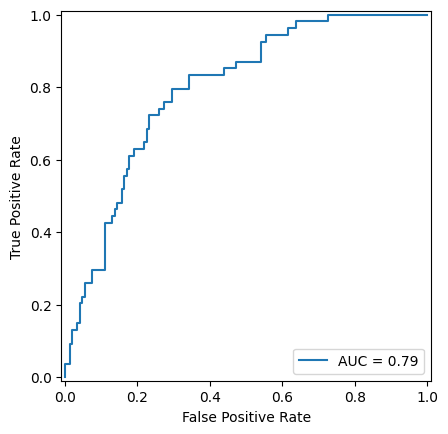

In [54]:
lr_prob = np.clip(lr.predict(X_test),0,1)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
auc = roc_auc_score(y_test, lr_prob)
RocCurveDisplay(fpr= fpr, tpr=tpr, roc_auc=auc).plot()

Try to improve your model by using more (or less) information we have from the dataset. That is change the features we are including.
